In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
# Define the file path
file_path = r'/Users/tktha/OneDrive/Desktop/ML MODELS/PROJECT_BANK/archive/data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


c:\Users\tktha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [2]:
# Print the list of all columns present in the DataFrame
print(df.columns.tolist())


['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [3]:
# Calculate the count of null values for each column
null_counts = df.isnull().sum()

# Filter columns with non-zero null counts
columns_with_null = null_counts[null_counts > 0]

# Check if there are columns with null values
if columns_with_null.empty:
    print("There are no null values in the DataFrame.")
else:
    # Print column names with their respective counts of null values
    for column, count in columns_with_null.items():
        print(f"Column '{column}' has {count} null values.")


There are no null values in the DataFrame.


In [4]:
object_columns = df.select_dtypes(include=['object'])

# Print the names of columns with dtype 'object'
# if no object dtype then no need for feature encoding
if not object_columns.empty:
    print("Columns with dtype 'object':")
    for column in object_columns.columns:
        print(column)
else:
    print("There are no columns with dtype 'object'.")


There are no columns with dtype 'object'.


In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
# Find correlation matrix to remove redundant columns.
correlation_matrix = df.corr()

# Get upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than 0.80 
high_correlation_pairs = [(column1, column2) for column1 in upper_triangle.columns
                          for column2 in upper_triangle.columns
                          if abs(upper_triangle.loc[column1, column2]) > 0.80]

# Print pairs of columns with correlation greater than 0.80 
if high_correlation_pairs:
    print("Pairs of columns with correlation greater than 0.80 :")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}")
else:
    print("There are no pairs of columns with correlation greater than 0.80 .")


Pairs of columns with correlation greater than 0.80 :
 ROA(C) before interest and depreciation before interest and  ROA(A) before interest and % after tax
 ROA(C) before interest and depreciation before interest and  ROA(B) before interest and depreciation after tax
 ROA(C) before interest and depreciation before interest and  Net Income to Total Assets
 ROA(A) before interest and % after tax and  ROA(B) before interest and depreciation after tax
 ROA(A) before interest and % after tax and  Net Income to Total Assets
 ROA(B) before interest and depreciation after tax and  Net Income to Total Assets
 Operating Gross Margin and  Realized Sales Gross Margin
 Operating Gross Margin and  Gross Profit to Sales
 Realized Sales Gross Margin and  Gross Profit to Sales
 Operating Profit Rate and  Pre-tax net Interest Rate
 Operating Profit Rate and  After-tax net Interest Rate
 Operating Profit Rate and  Continuous interest rate (after tax)
 Pre-tax net Interest Rate and  After-tax net Interest 

In [7]:
# Duplicate the DataFrame

df1 = df.copy()  
correlation_matrix = df1.corr()

# Get upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.8
high_correlation_columns = [column for column in upper_triangle.columns
                            if any(abs(upper_triangle[column]) > 0.8)]

# Remove columns with high correlation
df1 = df1.drop(columns=high_correlation_columns)

# Print the columns that are removed
print("Columns removed due to high correlation (> 0.8): \n ", high_correlation_columns)


Columns removed due to high correlation (> 0.8): 
  [' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Assets', ' Operating Funds to Liability', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Net Income to Total Assets', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity']


List of present columns in df1:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Inventory and accounts receivable/Ne

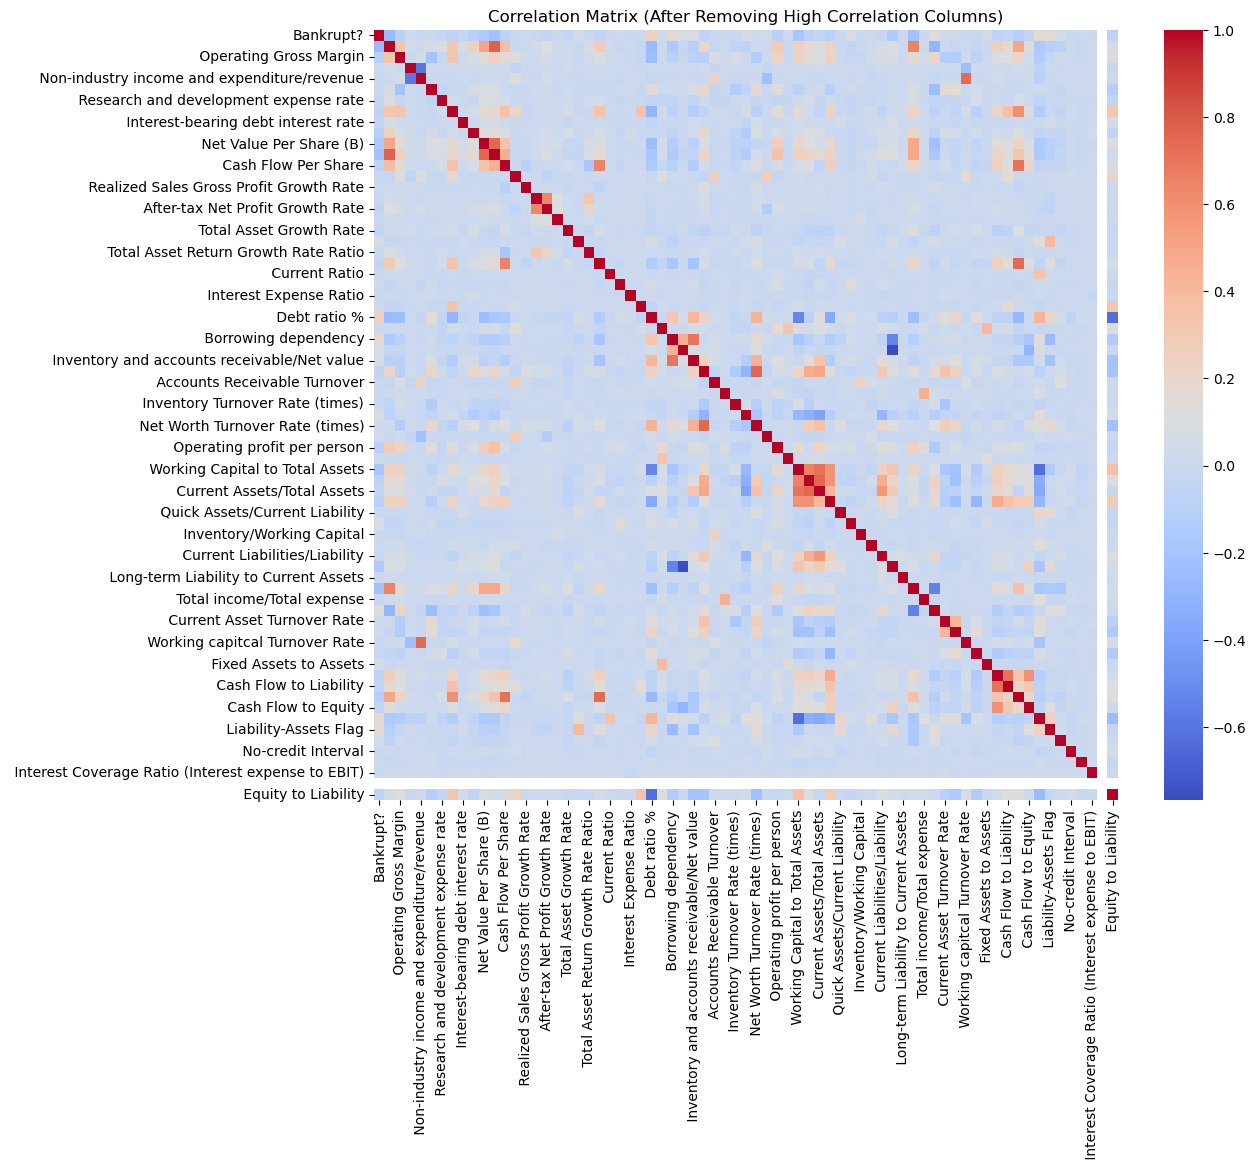

In [8]:
# Print list of present columns in df1
print("List of present columns in df1:")
print(df1.columns.tolist())

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (After Removing High Correlation Columns)')
plt.show()


In [9]:
# Separate features (X) and target variable (y)
X = df1.drop(columns=['Bankrupt?']) 
y = df1['Bankrupt?'] 



In [10]:
X.head()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490


In [11]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Long-term fund suitability ratio (A)',
       ' Borrowing dependency', ' Conting

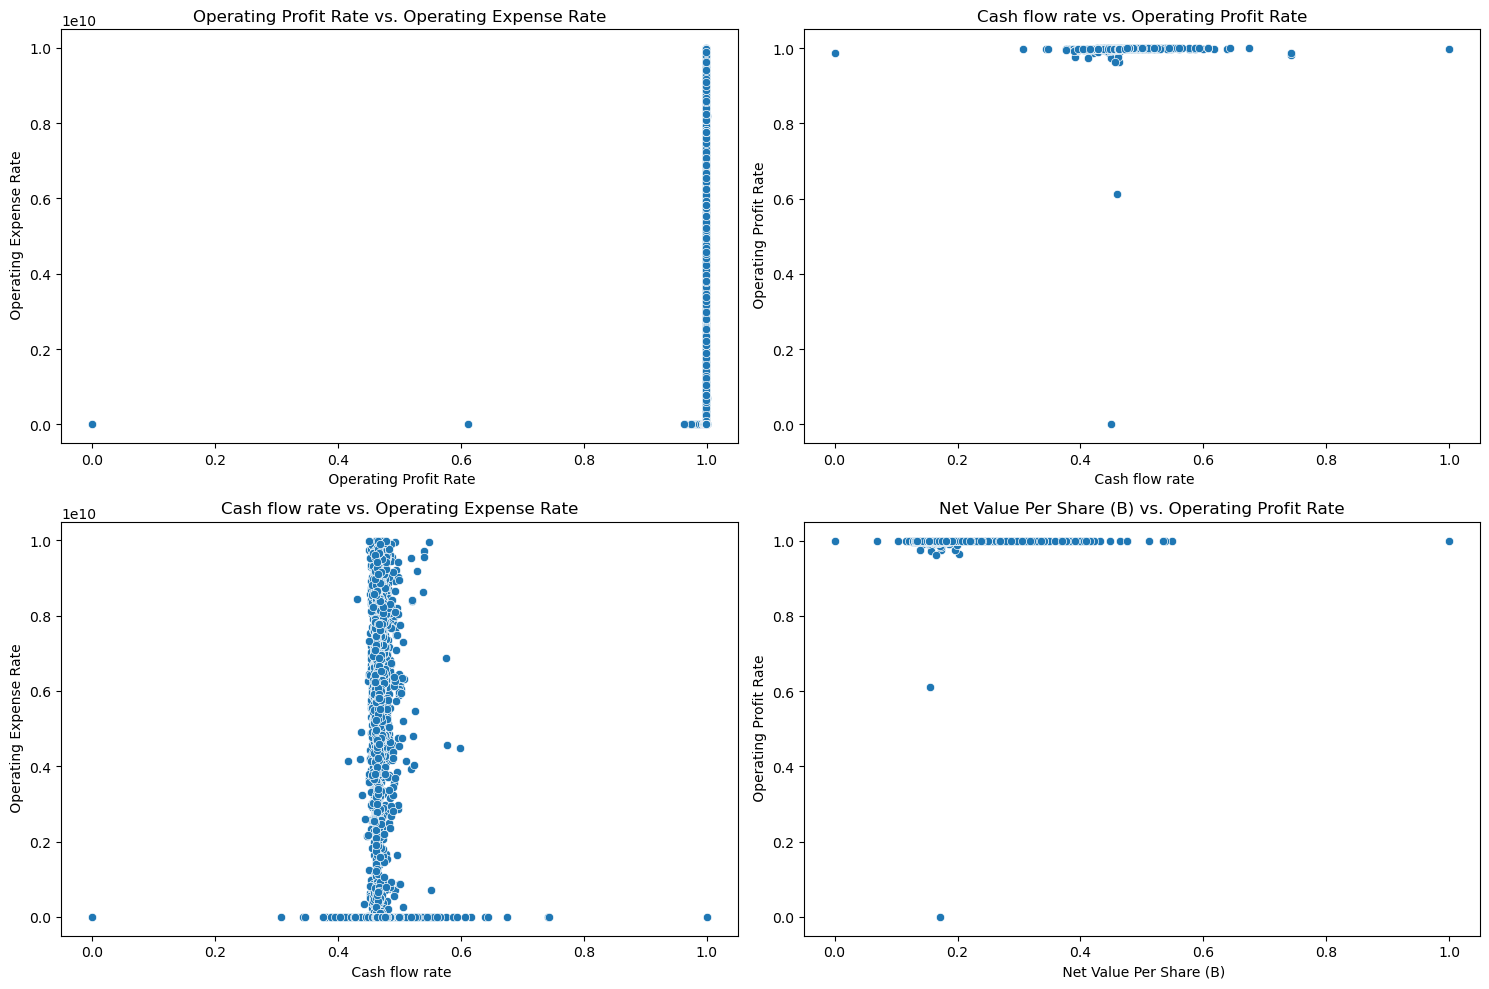

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Second half of possible combinations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot: Operating Profit Rate vs. Operating Expense Rate
sns.scatterplot(ax=axes[0, 0], x=' Operating Profit Rate', y=' Operating Expense Rate', data=X)
axes[0, 0].set_title('Operating Profit Rate vs. Operating Expense Rate')

# Scatter plot: Cash flow rate vs. Operating Profit Rate
sns.scatterplot(ax=axes[0, 1], x=' Cash flow rate', y=' Operating Profit Rate', data=X)
axes[0, 1].set_title('Cash flow rate vs. Operating Profit Rate')

# Scatter plot: Cash flow rate vs. Operating Expense Rate
sns.scatterplot(ax=axes[1, 0], x=' Cash flow rate', y=' Operating Expense Rate', data=X)
axes[1, 0].set_title('Cash flow rate vs. Operating Expense Rate')

# Scatter plot: Net Value Per Share (B) vs. Operating Profit Rate
sns.scatterplot(ax=axes[1, 1], x=' Net Value Per Share (B)', y=' Operating Profit Rate', data=X)
axes[1, 1].set_title('Net Value Per Share (B) vs. Operating Profit Rate')

plt.tight_layout()
plt.show()


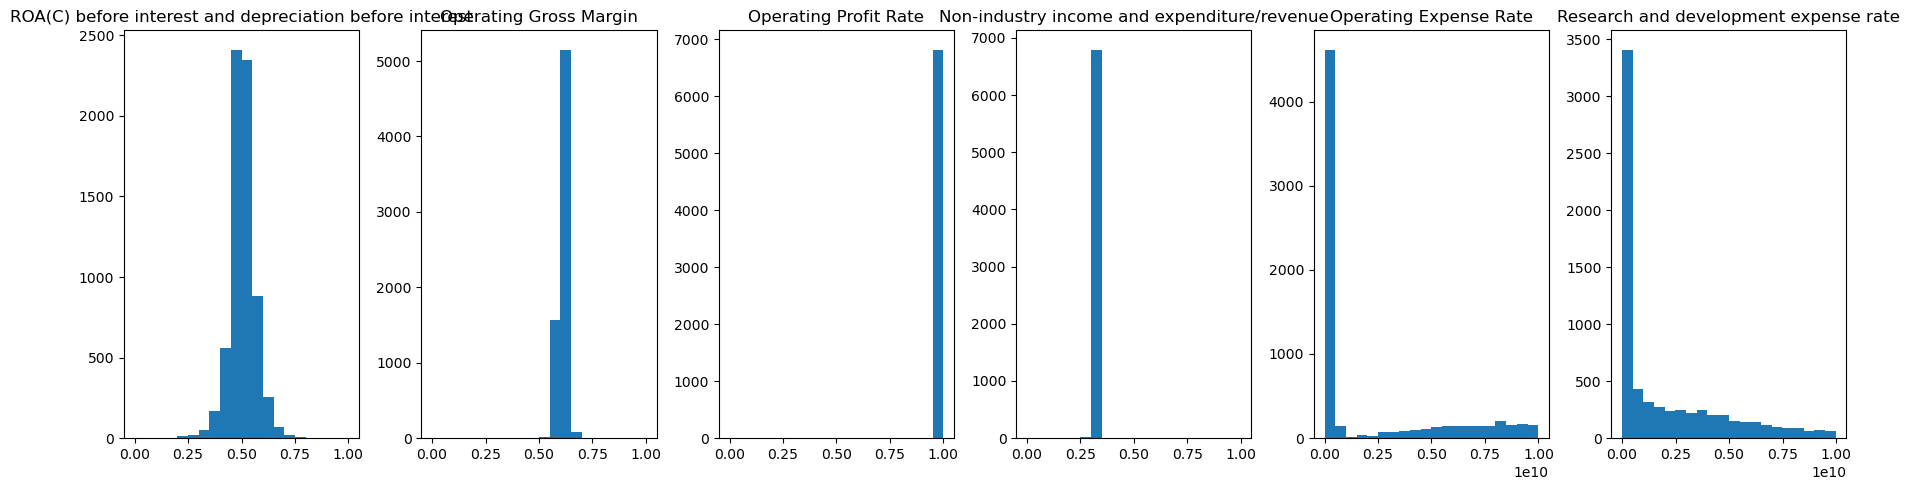

In [13]:
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(18, 5))

# Plot histograms for each combination of columns
plt.subplot(1, 6, 1)
plt.hist(X[' ROA(C) before interest and depreciation before interest'], bins=20)
plt.title('ROA(C) before interest and depreciation before interest')

plt.subplot(1, 6, 2)
plt.hist(X[' Operating Gross Margin'], bins=20)
plt.title('Operating Gross Margin')

plt.subplot(1, 6, 3)
plt.hist(X[' Operating Profit Rate'], bins=20)
plt.title('Operating Profit Rate')

plt.subplot(1, 6, 4)
plt.hist(X[' Non-industry income and expenditure/revenue'], bins=20)
plt.title('Non-industry income and expenditure/revenue')

plt.subplot(1, 6, 5)
plt.hist(X[' Operating Expense Rate'], bins=20)
plt.title('Operating Expense Rate')

plt.subplot(1, 6, 6)
plt.hist(X[' Research and development expense rate'], bins=20)
plt.title('Research and development expense rate')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Display the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)



X_train shape: (5796, 70)
X_val shape: (1023, 70)
y_train shape: (5796,)
y_val shape: (1023,)


In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# RobustScaler is used for feature scaling
scaler_train = RobustScaler()
scaler_val = RobustScaler()

# Fit scaler to training data and transform training data
X_train_scaled = scaler_train.fit_transform(X_train)
# Transform validation data using the scaler fitted on training data
X_val_scaled = scaler_train.transform(X_val)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model architecture with Dropout layers
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer with specified shape
    Dense(128, activation='relu'),  # No need to specify input_shape here
    Dropout(0.2),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val), 
                    batch_size=64, 
                    epochs=100, 
                    verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 8667528192.0000 - val_accuracy: 0.9580 - val_loss: 10628065280.0000
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 1743092864.0000 - val_accuracy: 0.9580 - val_loss: 6715231232.0000
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 1686555904.0000 - val_accuracy: 0.9570 - val_loss: 4933335552.0000
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 631462784.0000 - val_accuracy: 0.9580 - val_loss: 8904119296.0000
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9623 - loss: 528030624.0000 - val_accuracy: 0.9511 - val_loss: 5926440960.0000
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 567206592.0000 - val_accuracy: 0.9570 - val_loss: 15862113280.0000
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9553 - loss: 308925888.0000 - val_accuracy: 0.9570 - val_loss: 134

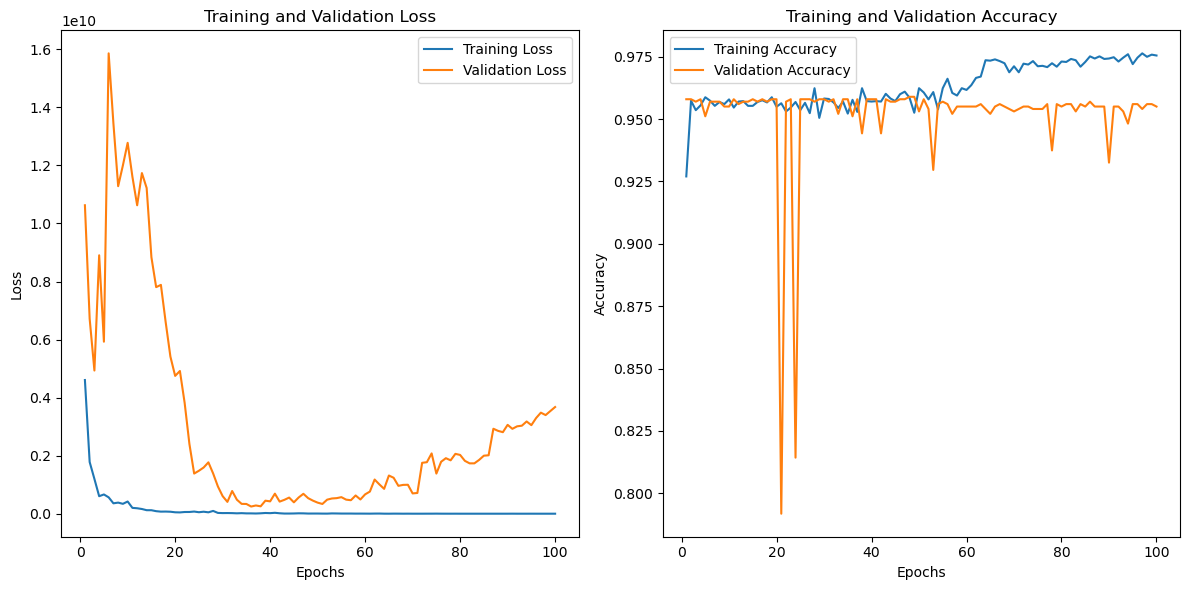

In [17]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import pandas as pd

# Filter out ConvergenceWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load your data and define X and y

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Define the models excluding PCA
models = [
    ('SVM', SVC(class_weight='balanced')), 
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')), 
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Bagging Classifier', BaggingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Ridge Classifier', RidgeClassifier(class_weight='balanced')),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('LDA', LDA())
]

# Create pipelines for each model with RobustScaler
pipelines = []
for model_name, model in models:
            
    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        (model_name, model)
    ])
    pipelines.append((model_name, pipeline))

# Evaluate each model using cross-validation
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Using stratified cross-validation
for model_name, pipeline in pipelines:
    # Calculate training accuracy
    train_acc = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy').mean()
    # Calculate validation accuracy
    val_acc = cross_val_score(pipeline, X_val, y_val, cv=cv, scoring='accuracy').mean()
    results.append((model_name, train_acc, val_acc))

# Display results in a table
results_df = pd.DataFrame(results, columns=['Model', 'Mean Accuracy (Train)', 'Mean Accuracy (Validation)'])
print(results_df)


c:\Users\tktha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.47717e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\tktha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.24525e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\tktha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10975e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\tktha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35064e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\tktha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

                   Model  Mean Accuracy (Train)  Mean Accuracy (Validation)
0                    SVM               0.782091                    0.772166
1          Decision Tree               0.953071                    0.949173
2          Random Forest               0.970497                    0.957977
3      Gradient Boosting               0.971705                    0.952104
4     Bagging Classifier               0.970324                    0.957967
5    AdaBoost Classifier               0.966357                    0.956973
6    K-Nearest Neighbors               0.968599                    0.957972
7    Logistic Regression               0.442745                    0.675595
8       Ridge Classifier               0.855936                    0.858293
9   Gaussian Naive Bayes               0.063665                    0.133926
10                   LDA               0.963942                    0.937441
